<a href="https://colab.research.google.com/github/karriechou/inf2178-expdesignfordatascience-w23/blob/main/mid-term/group38/group38_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Data Preprocessing and Cleaning

In [ ]:
def test_na_num(df):
    for column in df:
        print(sum(df[column].isna()), column)

In [ ]:
data = pd.read_csv("Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv")

In [ ]:
test_na_num(data)

0 Arrest_Year
0 Arrest_Month
0 EventID
469 ArrestID
0 PersonID
4 Perceived_Race
0 Sex
24 Age_group__at_arrest_
0 Youth_at_arrest__under_18_years
0 ArrestLocDiv
0 StripSearch
0 Booked
165 Occurrence_Category
0 Actions_at_arrest___Concealed_i
0 Actions_at_arrest___Combative__
0 Actions_at_arrest___Resisted__d
0 Actions_at_arrest___Mental_inst
0 Actions_at_arrest___Assaulted_o
0 Actions_at_arrest___Cooperative
57475 SearchReason_CauseInjury
57475 SearchReason_AssistEscape
57475 SearchReason_PossessWeapons
57475 SearchReason_PossessEvidence
57475 ItemsFound
0 ObjectId


In [ ]:
data[0:5] # viewing data before pre-processing and cleaning
for feature in data.columns:
  print(feature)

test_na_num(data)

Arrest_Year
Arrest_Month
EventID
ArrestID
PersonID
Perceived_Race
Sex
Age_group__at_arrest_
Youth_at_arrest__under_18_years
ArrestLocDiv
StripSearch
Booked
Occurrence_Category
Actions_at_arrest___Concealed_i
Actions_at_arrest___Combative__
Actions_at_arrest___Resisted__d
Actions_at_arrest___Mental_inst
Actions_at_arrest___Assaulted_o
Actions_at_arrest___Cooperative
SearchReason_CauseInjury
SearchReason_AssistEscape
SearchReason_PossessWeapons
SearchReason_PossessEvidence
ItemsFound
ObjectId
0 Arrest_Year
0 Arrest_Month
0 EventID
469 ArrestID
0 PersonID
4 Perceived_Race
0 Sex
24 Age_group__at_arrest_
0 Youth_at_arrest__under_18_years
0 ArrestLocDiv
0 StripSearch
0 Booked
165 Occurrence_Category
0 Actions_at_arrest___Concealed_i
0 Actions_at_arrest___Combative__
0 Actions_at_arrest___Resisted__d
0 Actions_at_arrest___Mental_inst
0 Actions_at_arrest___Assaulted_o
0 Actions_at_arrest___Cooperative
57475 SearchReason_CauseInjury
57475 SearchReason_AssistEscape
57475 SearchReason_PossessWeap

In [ ]:
data=data.dropna(subset=['ArrestID','Age_group__at_arrest_','Perceived_Race','Occurrence_Category'])
data=data.fillna(0)

In [ ]:
test_na_num(data)

0 Arrest_Year
0 Arrest_Month
0 EventID
0 ArrestID
0 PersonID
0 Perceived_Race
0 Sex
0 Age_group__at_arrest_
0 Youth_at_arrest__under_18_years
0 ArrestLocDiv
0 StripSearch
0 Booked
0 Occurrence_Category
0 Actions_at_arrest___Concealed_i
0 Actions_at_arrest___Combative__
0 Actions_at_arrest___Resisted__d
0 Actions_at_arrest___Mental_inst
0 Actions_at_arrest___Assaulted_o
0 Actions_at_arrest___Cooperative
0 SearchReason_CauseInjury
0 SearchReason_AssistEscape
0 SearchReason_PossessWeapons
0 SearchReason_PossessEvidence
0 ItemsFound
0 ObjectId


In [ ]:
# rearrange searchreasons, the attributes contains 5 values, 0 means no search reason, 1 means one search reason, etc.
data['SearchReason']=data['SearchReason_CauseInjury']+data['SearchReason_AssistEscape']+data['SearchReason_PossessWeapons']+data['SearchReason_PossessEvidence']

In [ ]:
# exchange 0 and 1, 0 means cooperative, 1 means otherwise.
data['Actions_at_arrest___Cooperative'] = data['Actions_at_arrest___Cooperative'].replace({0: 1, 1: 0})

In [ ]:
# rearrange action at arrest, the attributes contains 4 values, 0 means cooperative, 1 means have one action that is not cooperative, etc.
data['Actions_at_arrest']=data['Actions_at_arrest___Concealed_i']+data['Actions_at_arrest___Combative__']+data['Actions_at_arrest___Resisted__d']+data['Actions_at_arrest___Mental_inst']+data['Actions_at_arrest___Assaulted_o']+data['Actions_at_arrest___Cooperative']

In [ ]:
# from here, start to deal with Occurence_Category
data['Occurrence_Category'].unique()

array(['Assault & Other crimes against persons', 'Harassment/Threatening',
       'FTA/FTC/Compliance Check/Parollee', 'Assault', 'Robbery/Theft',
       'Sexual Related Crime', 'Mischief & Fraud', 'Warrant',
       'Police Category - Administrative',
       'FTA/FTC, Compliance Check & Parollee', 'Drug Related', 'Weapons',
       'Vehicle Related (inc. Impaired)', 'Other Offence',
       'Harassment & Threatening', 'Weapons & Homicide',
       'Robbery & Theft', 'Break and Enter', 'Mischief', 'Break & Enter',
       'Sexual Related Crimes & Crimes Against Children',
       'Crimes against Children', 'Police Category - Incident', 'Fraud',
       'LLA', 'Mental Health', 'Other Statute', 'Vehicle Related',
       'Other Statute & Other Incident Type', 'Impaired', 'Homicide'],
      dtype=object)

In [ ]:
dict_for_replace={'Assault & Other crimes against persons':0,
                  'Assault':0,
                 'Robbery & Theft':1,
                 'Robbery/Theft':1,
                 'Warrant':2,
                 'FTA/FTC/Compliance Check/Parollee':3,
                 'FTA/FTC, Compliance Check & Parollee':3,
                 'Police Category - Administrative':4,
                 'Drug Related':5}

In [ ]:
data['Occurrence_Category']=data['Occurrence_Category'].replace(dict_for_replace)

In [ ]:
data['Occurrence_Category']

0                             0
1                             0
2                             0
3        Harassment/Threatening
4                             3
                  ...          
65271           Vehicle Related
65272                         0
65273                         0
65274                         1
65275                  Mischief
Name: Occurrence_Category, Length: 64615, dtype: object

In [ ]:
data['Occurrence_Category'] = data['Occurrence_Category'].where(data['Occurrence_Category'].isin(list(dict_for_replace.values()))==True, 6)
# 7 means others

In [ ]:
data['Occurrence_Category']

0        0
1        0
2        0
3        6
4        3
        ..
65271    6
65272    0
65273    0
65274    1
65275    6
Name: Occurrence_Category, Length: 64615, dtype: object

In [ ]:
data = data[["Arrest_Year", "Arrest_Month", "Perceived_Race", "Sex", "Age_group__at_arrest_", "Youth_at_arrest__under_18_years", "StripSearch",'Booked', "Occurrence_Category", "ItemsFound","SearchReason",'Actions_at_arrest']]
data = data.dropna(subset = ["Perceived_Race", "Age_group__at_arrest_", "Occurrence_Category"])


In [ ]:
data.head()

,Arrest_Year,Arrest_Month,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,StripSearch,Booked,Occurrence_Category,ItemsFound,SearchReason,Actions_at_arrest
0,2020,July-Sept,White,M,Aged 35 to 44 years,Not a youth,0,1,0,0.0,0.0,0
1,2020,July-Sept,White,M,Aged 35 to 44 years,Not a youth,0,1,0,0.0,0.0,1
2,2020,Oct-Dec,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,0,1,0,0.0,0.0,1
3,2021,Jan-Mar,Black,M,Aged 25 to 34 years,Not a youth,0,0,6,0.0,0.0,1
4,2021,Jan-Mar,South Asian,M,Aged 25 to 34 years,Not a youth,0,1,3,0.0,0.0,1


In [ ]:
data['Occurrence_Category']

0        0
1        0
2        0
3        6
4        3
        ..
65271    6
65272    0
65273    0
65274    1
65275    6
Name: Occurrence_Category, Length: 64615, dtype: object

In [ ]:
series = pd.Series(data['Occurrence_Category'])
unique_values = series.unique()
unique_values

array([0, 6, 3, 1, 2, 4, 5], dtype=object)

In [ ]:
test_na_num(data)

0 Arrest_Year
0 Arrest_Month
0 Perceived_Race
0 Sex
0 Age_group__at_arrest_
0 Youth_at_arrest__under_18_years
0 StripSearch
0 Booked
0 Occurrence_Category
0 ItemsFound
0 SearchReason
0 Actions_at_arrest


In [ ]:
data.head() # cleaned data

,Arrest_Year,Arrest_Month,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,StripSearch,Booked,Occurrence_Category,ItemsFound,SearchReason,Actions_at_arrest
0,2020,July-Sept,White,M,Aged 35 to 44 years,Not a youth,0,1,0,0.0,0.0,0
1,2020,July-Sept,White,M,Aged 35 to 44 years,Not a youth,0,1,0,0.0,0.0,1
2,2020,Oct-Dec,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,0,1,0,0.0,0.0,1
3,2021,Jan-Mar,Black,M,Aged 25 to 34 years,Not a youth,0,0,6,0.0,0.0,1
4,2021,Jan-Mar,South Asian,M,Aged 25 to 34 years,Not a youth,0,1,3,0.0,0.0,1


# EDA – Visualizations

White                   27407
Black                   17352
Unknown or Legacy        5002
East/Southeast Asian     4388
South Asian              3594
Middle-Eastern           3213
Indigenous               1907
Latino                   1752
Name: Perceived_Race, dtype: int64


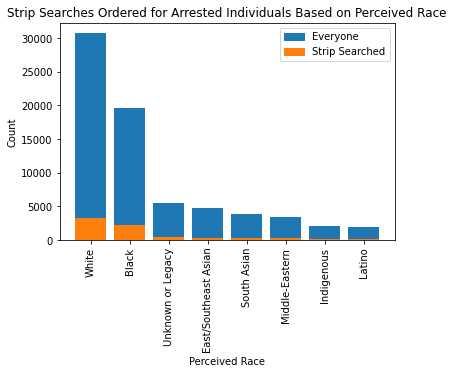

In [ ]:
import matplotlib.pyplot as plt

# Ordered strip searches by perceived race of arrested individual

races = data.Perceived_Race.value_counts().index.tolist()
race_counts = data.Perceived_Race.value_counts()
print(race_counts)
colours = {"Everyone": "C0", "Strip Searched": "C1"}
labels = list(colours.keys())
handles = [plt.Rectangle((0, 0), 1, 1, color = colours[label]) for label in labels]

plt.bar(races, race_counts, bottom = data.groupby(["Perceived_Race"])["StripSearch"].sum().sort_values(ascending = False), color = "C0")
plt.bar(races, data.groupby(["Perceived_Race"])["StripSearch"].sum().sort_values(ascending = False), color = "C1")
plt.xticks(rotation = 90)
plt.title("Strip Searches Ordered for Arrested Individuals Based on Perceived Race")
plt.ylabel("Count")
plt.xlabel("Perceived Race")
plt.legend(handles, labels)

In [ ]:
data["Age_group_clean"] = data["Age_group__at_arrest_"].replace({"Aged 17 years and younger": "Aged 17 years and under", "Aged 65 and older": "Aged 65 years and older"})

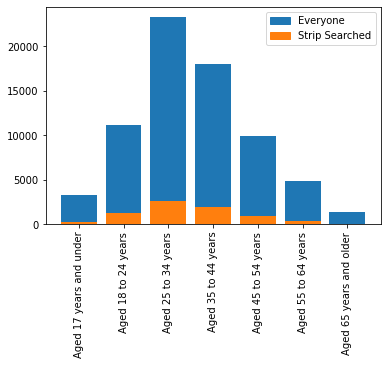

In [ ]:
# Ordered strip searches by age bracket of arrested individual

ages = data.Age_group_clean.value_counts().index.tolist()
reordered_1 = ages.pop(ages.index("Aged 17 years and under"))
reordered_2 = ages.pop(ages.index("Aged 18 to 24 years"))
ages.insert(0, reordered_1)
ages.insert(1, reordered_2)

age_counts = data.Age_group_clean.value_counts().sort_index(ascending = True)

plt.bar(x = ages, height = age_counts, bottom = data.groupby(["Age_group_clean"])["StripSearch"].sum(), color = "C0")
plt.bar(x = ages, height = data.groupby(["Age_group_clean"])["StripSearch"].sum(), color = "C1")
plt.xticks(rotation = 90)
plt.legend(handles, labels)

In [ ]:
# Time series variable
data["Time_series"] = np.where((data["Arrest_Year"] == 2020) & (data["Arrest_Month"] == "Jan-Mar"), 1, 
                               (np.where((data["Arrest_Year"] == 2020) & (data["Arrest_Month"] == "Apr-June"), 2, 
                                         (np.where((data["Arrest_Year"] == 2020) & (data["Arrest_Month"] == "July-Sept"), 3, 
                                                   (np.where((data["Arrest_Year"] == 2020) & (data["Arrest_Month"] == "Oct-Dec"), 4, 
                                                             (np.where((data["Arrest_Year"] == 2021) & (data["Arrest_Month"] == "Jan-Mar"), 5, 
                                                                       (np.where((data["Arrest_Year"] == 2021) & (data["Arrest_Month"] == "Apr-June"), 6, 
                                                                                 (np.where((data["Arrest_Year"] == 2021) & (data["Arrest_Month"] == "July-Sept"), 7, 
                                                                                           (np.where((data["Arrest_Year"] == 2021) & (data["Arrest_Month"] == "Oct-Dec"), 8, 0)))))))))))))))

Text(0, 0.5, 'Number of Strip Searches Booked')

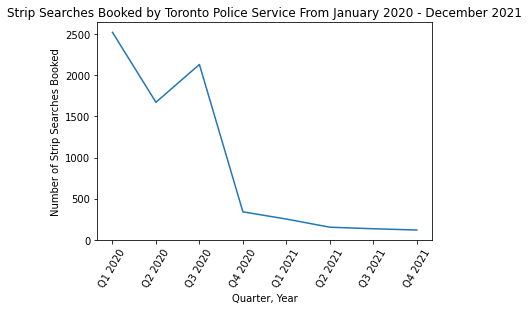

In [ ]:
# Line chart of strip search counts over time
StripSearch_1_data = data[data["StripSearch"] == 1]
StripSearch_1_data.groupby(["Time_series"])["StripSearch"].value_counts()

StripSearch_1_data.groupby(["Time_series"])["StripSearch"].value_counts().sort_index(ascending = True).plot()
plt.title("Strip Searches Booked by Toronto Police Service From January 2020 - December 2021")
axes = plt.gca()
axes.set_xticks(ticks = [0, 1, 2, 3, 4, 5, 6, 7])
axes.set_xticklabels(["Q1 2020", "Q2 2020", "Q3 2020", "Q4 2020", "Q1 2021", "Q2 2021", "Q3 2021", "Q4 2021"])
plt.xticks(rotation = 60)
plt.xlabel("Quarter, Year")
plt.ylabel("Number of Strip Searches Booked")

Text(0, 0.5, 'Number of Strip Searches Booked')

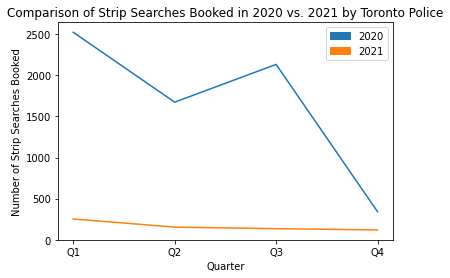

In [ ]:
StripSearch_1_2020_data = data[(data["Arrest_Year"] == 2020) & (data["StripSearch"] == 1)]
StripSearch_1_2021_data = data[(data["Arrest_Year"] == 2021) & (data["StripSearch"] == 1)]

plt1 = StripSearch_1_2020_data.groupby(["Time_series"])["StripSearch"].value_counts().sort_index(ascending = True).plot()
plt2 = StripSearch_1_2021_data.groupby(["Time_series"])["StripSearch"].value_counts().sort_index(ascending = True).plot()
plt_axes = plt.gca()
plt_axes.set_xticks([0, 1, 2, 3])
plt_axes.set_xticklabels(["Q1", "Q2", "Q3", "Q4"])

colours = {"2020": "C0", "2021": "C1"}
labels = list(colours.keys())
handles = [plt.Rectangle((0, 0), 1, 1, color = colours[label]) for label in labels]
plt.legend(handles, labels)

plt.title("Comparison of Strip Searches Booked in 2020 vs. 2021 by Toronto Police")
plt.xlabel("Quarter")
plt.ylabel("Number of Strip Searches Booked")

In [ ]:
# 0 in Actions_at_arrest = cooperative
# 1+ in Actions_at_arrest = uncooperative

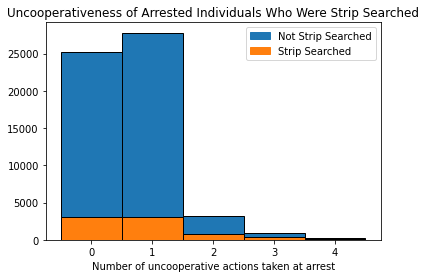

In [ ]:
Actions_at_arrest_NotStripSearched = data[(data["StripSearch"] == 0)]
Actions_at_arrest_StripSearched = data[(data["StripSearch"] == 1)]

plt.hist(Actions_at_arrest_NotStripSearched["Actions_at_arrest"], bins = np.arange(6)-0.5, color = "C0", edgecolor = "black")
# plt.xlabel("Number of uncooperative actions taken at arrest")
# plt.title("Uncooperativeness of Arrested Individuals Who Were Not Strip Searched")

plt.hist(Actions_at_arrest_StripSearched["Actions_at_arrest"], bins = np.arange(6)-0.5, color = "C1", edgecolor = "black")
plt.xlabel("Number of uncooperative actions taken at arrest")
plt.title("Uncooperativeness of Arrested Individuals Who Were Strip Searched")

colours = {"Not Strip Searched": "C0", "Strip Searched": "C1"}
labels = list(colours.keys())
handles = [plt.Rectangle((0, 0), 1, 1, color = colours[label]) for label in labels]
plt.legend(handles, labels)

In [ ]:
Actions_at_arrest_StripSearched

,Arrest_Year,Arrest_Month,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,StripSearch,Booked,Occurrence_Category,ItemsFound,SearchReason,Actions_at_arrest,Age_group_clean,Time_series
12,2021,Apr-June,Black,M,Aged 25 to 34 years,Not a youth,1,1,6,0.0,3.0,0,Aged 25 to 34 years,6
14,2020,Apr-June,Black,M,Aged 25 to 34 years,Not a youth,1,1,6,0.0,3.0,1,Aged 25 to 34 years,2
33,2021,Jan-Mar,White,M,Aged 35 to 44 years,Not a youth,1,1,6,0.0,2.0,0,Aged 35 to 44 years,5
38,2020,Apr-June,Latino,M,Aged 18 to 24 years,Not a youth,1,1,3,0.0,2.0,0,Aged 18 to 24 years,2
42,2020,July-Sept,South Asian,F,Aged 25 to 34 years,Not a youth,1,1,0,0.0,1.0,1,Aged 25 to 34 years,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63915,2021,July-Sept,Black,M,Aged 25 to 34 years,Not a youth,1,1,5,0.0,2.0,0,Aged 25 to 34 years,7
64108,2021,Oct-Dec,White,M,Aged 35 to 44 years,Not a youth,1,1,6,0.0,0.0,1,Aged 35 to 44 years,8
64235,2021,July-Sept,South Asian,M,Aged 25 to 34 years,Not a youth,1,1,6,0.0,1.0,0,Aged 25 to 34 years,7
64347,2021,Oct-Dec,Black,M,Aged 17 years and under,Youth (aged 17 years and under),1,1,6,1.0,2.0,1,Aged 17 years and under,8


In [ ]:
barplot_races_uncooperative = []
for race in races:
  barplot_races_uncooperative.append(data[(data["Perceived_Race"] == race)]["Actions_at_arrest"])

mean_uncooperative_actions_race = []
for set in barplot_races_uncooperative: 
  mean_uncooperative_actions_race.append(np.mean(set))

sd_uncooperative_actions_race = []
for set in barplot_races_uncooperative: 
    sd_uncooperative_actions_race.append(np.std(set))

barplot_races_uncooperative_data = np.array([races, mean_uncooperative_actions_race, sd_uncooperative_actions_race]).T
barplot_races_uncooperative_table = pd.DataFrame(data = barplot_races_uncooperative_data, columns = ["Perceived Race", "Mean", "Standard Deviation"])
barplot_races_uncooperative_table["Mean"] = np.float64(barplot_races_uncooperative_table["Mean"])
barplot_races_uncooperative_table["Standard Deviation"] = np.float64(barplot_races_uncooperative_table["Standard Deviation"])

barplot_races_uncooperative_table

,Perceived Race,Mean,Standard Deviation
0,White,0.683439,0.726551
1,Black,0.716344,0.748590
2,Unknown or Legacy,0.644742,0.664954
3,East/Southeast Asian,0.566773,0.645692
4,South Asian,0.627156,0.654251
5,Middle-Eastern,0.642702,0.695864
6,Indigenous,0.807027,0.818310
7,Latino,0.599315,0.705781


<ErrorbarContainer object of 3 artists>

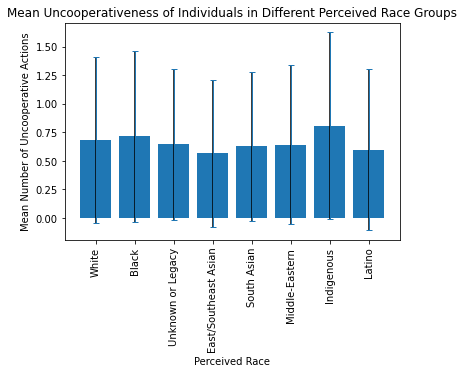

In [ ]:
plt.bar(barplot_races_uncooperative_table["Perceived Race"], barplot_races_uncooperative_table["Mean"], yerr = barplot_races_uncooperative_table["Standard Deviation"])
plt.xlabel("Perceived Race")
plt.xticks(rotation = 90)
plt.ylabel("Mean Number of Uncooperative Actions")
plt.title("Mean Uncooperativeness of Individuals in Different Perceived Race Groups")

axes = plt.subplot()
axes.errorbar(barplot_races_uncooperative_table["Perceived Race"], barplot_races_uncooperative_table["Mean"], yerr = barplot_races_uncooperative_table["Standard Deviation"], 
              elinewidth = 1, capsize = 3.0, fmt = "none")

In [ ]:
data=data[['Time_series','Perceived_Race','Sex','Age_group_clean','Youth_at_arrest__under_18_years','StripSearch','Booked','Occurrence_Category','ItemsFound','SearchReason','Actions_at_arrest']]

In [ ]:
data['Age_group_clean'].unique()

array(['Aged 35 to 44 years', 'Aged 25 to 34 years',
       'Aged 45 to 54 years', 'Aged 55 to 64 years',
       'Aged 18 to 24 years', 'Aged 65 years and older',
       'Aged 17 years and under'], dtype=object)

In [ ]:
data['Youth_at_arrest__under_18_years'].unique()

array(['Not a youth', 'Youth (aged 17 and younger)',
       'Youth (aged 17 years and under)'], dtype=object)

In [ ]:
# making Perceived_Race numeric

race_dict={'White':0,
           "Unknown or Legacy":1,
           "Black":2,
           "South Asian":3,
           "Indigenous":4,
           "Middle-Eastern":5,
           'Latino':6,
           "East/Southeast Asian":7}
data['Perceived_Race']=data['Perceived_Race'].replace(race_dict)

In [ ]:
sex_dict={'M':0,'F':1,'U':2}
data['Sex']=data['Sex'].replace(sex_dict)

In [ ]:
age_dict0={}
i=0
for x in data['Age_group_clean'].unique():
  age_dict0[x]=i
  i+=1      

In [ ]:
age_dict={'Aged 17 years and under': 0,
          'Aged 18 to 24 years': 1,
          'Aged 25 to 34 years': 2,
          'Aged 35 to 44 years': 3,
          'Aged 45 to 54 years': 4,
          'Aged 55 to 64 years': 5,
          'Aged 65 years and older': 6,
          }

In [ ]:
data['Age_group_clean']=data['Age_group_clean'].replace(age_dict)

In [ ]:
youth_dict={'Youth (aged 17 and younger)':0,
            'Youth (aged 17 years and under)':0,
'Not a youth':1}

In [ ]:
data['Youth_at_arrest__under_18_years']=data['Youth_at_arrest__under_18_years'].replace(youth_dict)

In [ ]:
data=data.dropna()

In [ ]:
data

,Time_series,Perceived_Race,Sex,Age_group_clean,Youth_at_arrest__under_18_years,StripSearch,Booked,Occurrence_Category,ItemsFound,SearchReason,Actions_at_arrest
0,3,0,0,3,1,0,1,0,0.0,0.0,0
1,3,0,0,3,1,0,1,0,0.0,0.0,1
2,4,1,0,3,1,0,1,0,0.0,0.0,1
3,5,2,0,2,1,0,0,6,0.0,0.0,1
4,5,3,0,2,1,0,1,3,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
65271,8,4,1,2,1,0,0,6,0.0,0.0,2
65272,8,3,0,3,1,0,1,0,0.0,0.0,1
65273,8,0,1,4,1,0,0,0,0.0,0.0,1
65274,8,1,0,0,0,0,0,1,0.0,0.0,0


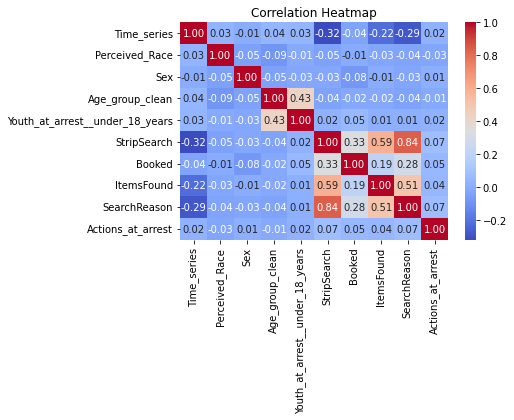

In [ ]:
import seaborn as sns

corr_matrix = data.corr()
fig, ax = plt.subplots()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax, fmt = "0.2f")
ax.set_title('Correlation Heatmap')

plt.show()

In [ ]:
#drop sex=U for convenience, as the number of sex=U is quite small.
data=data[data["Sex"]!=2]

# EDA – T-tests

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
#Hypothesis: strip searched None white people and white people act at the same way while arrested, given that they are strip searched.
#H0: Mean non_white=Mean white
#Ha: Mean non_white!=Mean white
data["Non_White"] = np.where((data["Perceived_Race"] == 0), 0, 1)
uncoop_race_group1 = data[(data["Non_White"] == 0) & (data["StripSearch"] == 1)] # white
uncoop_race_group2 = data[(data["Non_White"] == 1) & (data["StripSearch"] == 1)] # non-white

# Welch's t-test: for samples of unequal variance
ttest_ind(uncoop_race_group1['Actions_at_arrest'], uncoop_race_group2["Actions_at_arrest"], equal_var=False)

# result is significant

<ipython-input-52-18ff4f6b1e8e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Non_White"] = np.where((data["Perceived_Race"] == 0), 0, 1)


Ttest_indResult(statistic=-3.0885229329832646, pvalue=0.0020191899285704772)

In [ ]:
#Hypothesis: strip searched None white people and white people act at the same way while arrested, given that they are not strip searched.
#H0: Mean non_white=Mean white
#Ha: Mean non_white!=Mean white

uncoop_race_non_stripsearch_group1 = data[(data["Non_White"] == 0) & (data["StripSearch"] == 0)] # white
uncoop_race_non_stripsearch_group2 = data[(data["Non_White"] == 1) & (data["StripSearch"] == 0)] # non-white

# Welch's t-test: for samples of unequal variance
ttest_ind(uncoop_race_non_stripsearch_group1['Actions_at_arrest'], uncoop_race_non_stripsearch_group2["Actions_at_arrest"], equal_var=False)

# result is significant

Ttest_indResult(statistic=2.9486119222353993, pvalue=0.003193489378729995)

In [ ]:
#Hypothesis: strip searched Youth and adults act at the same way while arrested, given that they are strip searched.
#H0: Mean Youth=Mean adults
#Ha: Mean Youth!=Mean adults
uncoop_youth_group1 = data[(data["Youth_at_arrest__under_18_years"] == 1) & (data["StripSearch"] == 1)] # youth
uncoop_youth_group2 = data[(data["Youth_at_arrest__under_18_years"] == 0) & (data["StripSearch"] == 1)] # adult

# Welch's t-test: for samples of unequal variance
ttest_ind(uncoop_youth_group1['Actions_at_arrest'], uncoop_youth_group2["Actions_at_arrest"], equal_var=False)

# result is significant

Ttest_indResult(statistic=3.497863162864763, pvalue=0.0005414117861691657)

In [ ]:
youth_group1 = data[(data["Youth_at_arrest__under_18_years"] == 1)] # youth
adults_group2 = data[(data["Youth_at_arrest__under_18_years"] == 0)] # adult

ttest_ind(youth_group1['Actions_at_arrest'], adults_group2["Actions_at_arrest"],alternative='greater', equal_var=False)
# the youth are more uncooperative than adults

Ttest_indResult(statistic=6.642709772978391, pvalue=1.7852599476523315e-11)

In [ ]:
ttest_ind(youth_group1['Actions_at_arrest'], adults_group2["Actions_at_arrest"],alternative='greater', equal_var=False)


In [ ]:
#Hypothesis: strip searched Youth and adults act at the same way while arrested, given that they not are strip searched.
#H0: Mean Youth=Mean adults
#Ha: Mean Youth!=Mean adults
uncoop_youth_non_stripsearch_group1 = data[(data["Youth_at_arrest__under_18_years"] == 1) & (data["StripSearch"] == 0)] # youth
uncoop_youth_non_stripsearch_group2 = data[(data["Youth_at_arrest__under_18_years"] == 0) & (data["StripSearch"] == 0)] # adult

# Welch's t-test: for samples of unequal variance
ttest_ind(uncoop_youth_non_stripsearch_group1['Actions_at_arrest'], uncoop_youth_non_stripsearch_group2["Actions_at_arrest"], equal_var=False)

# result is significant

Ttest_indResult(statistic=5.421998021379758, pvalue=6.345417626270847e-08)

In [ ]:
data

,Time_series,Perceived_Race,Sex,Age_group_clean,Youth_at_arrest__under_18_years,StripSearch,Booked,Occurrence_Category,ItemsFound,SearchReason,Actions_at_arrest,Non_White
0,3,0,0,3,1,0,1,0,0.0,0.0,0,0
1,3,0,0,3,1,0,1,0,0.0,0.0,1,0
2,4,1,0,3,1,0,1,0,0.0,0.0,1,1
3,5,2,0,2,1,0,0,6,0.0,0.0,1,1
4,5,3,0,2,1,0,1,3,0.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
65271,8,4,1,2,1,0,0,6,0.0,0.0,2,1
65272,8,3,0,3,1,0,1,0,0.0,0.0,1,1
65273,8,0,1,4,1,0,0,0,0.0,0.0,1,0
65274,8,1,0,0,0,0,0,1,0.0,0.0,0,1


In [ ]:
ttest_ind(youth_group1['ItemsFound'], adults_group2["ItemsFound"],alternative='greater', equal_var=False)
#Police found more items on youth.

Ttest_indResult(statistic=2.8309913242765377, pvalue=0.0023338437689997466)

In [ ]:
#Hypothesis: stripsearched Male and Female act at the same way while arrested, given that they are strip searched.
#H0: Mean stripsearched Male=Mean stripsearched Female
#Ha: Mean stripsearched Male!=Mean stripsearched Female
uncoop_sex_group1 = data[(data["Sex"] == 1) & (data["StripSearch"] == 1)] # female
uncoop_sex_group2 = data[(data["Sex"] == 0) & (data["StripSearch"] == 1)] # male

# Welch's t-test: for samples of unequal variance
ttest_ind(uncoop_sex_group1['Actions_at_arrest'], uncoop_sex_group2["Actions_at_arrest"], equal_var=False)

# result is not significant

Ttest_indResult(statistic=-0.9432478045259425, pvalue=0.34568585953999675)

In [ ]:
#Hypothesis: stripsearched Male and Female act at the same way while arrested, given that they are not strip searched.
#H0: Mean non stripsearched Male=Mean non stripsearched Female
#Ha: Mean non stripsearched Male!=Mean non stripsearched Female
uncoop_sex_non_stripsearch_group1 = data[(data["Sex"] == 1) & (data["StripSearch"] == 0)] # youth
uncoop_sex_non_stripsearch_group2 = data[(data["Sex"] == 0) & (data["StripSearch"] == 0)] # adult

# Welch's t-test: for samples of unequal variance
ttest_ind(uncoop_sex_non_stripsearch_group1['Actions_at_arrest'], uncoop_sex_non_stripsearch_group2["Actions_at_arrest"], equal_var=False)

# result is significant

Ttest_indResult(statistic=4.34371463838641, pvalue=1.4090514199255714e-05)

In [ ]:
#Hypothesis: Strip searched people and non Strip searched people act at the same way while arrested.
#H0: Mean strip searched=Mean non strip searched
#Ha: Mean strip searched!=Mean non strip searched

uncoop_stripsearch_group1 = data[(data["StripSearch"] == 1)] # strip searched
uncoop_stripsearch_group2 = data[(data["StripSearch"] == 0)] # not strip searched

# Welch's t-test: for samples of unequal variance
ttest_ind(uncoop_stripsearch_group1['Actions_at_arrest'], uncoop_stripsearch_group2["Actions_at_arrest"], equal_var=False)

# result is significant

Ttest_indResult(statistic=14.998240893135485, pvalue=3.311761565523326e-50)

In [ ]:
def get_coop(action):
    if action != 0:
        return 1
    else:
        return 0

data['coop_or_not'] = data['Actions_at_arrest'].apply(get_coop)

<ipython-input-117-09617239c0c6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['coop_or_not'] = data['Actions_at_arrest'].apply(get_coop)


In [ ]:
# police do strip search based on cooperation while being arrested or not.
uncoop_stripsearch_group1 = data[(data["coop_or_not"] == 1)] # strip searched
coop_stripsearch_group2 = data[(data["coop_or_not"] == 0)] # not strip searched

# Welch's t-test: for samples of unequal variance
ttest_ind(uncoop_stripsearch_group1['StripSearch'], coop_stripsearch_group2["StripSearch"],alternative='greater' ,equal_var=False)
#conlusion：police deduct more strip search on uncooperative people.

Ttest_indResult(statistic=3.568155370423262, pvalue=0.00017988790037454702)

# ANOVA

In [ ]:
from scipy.stats import f
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
#create y and show a frequency table
grouped_data0 = data.groupby(['Perceived_Race', 'Sex'])['Actions_at_arrest'].apply(lambda x: (x == 0).sum()).reset_index()
grouped_data0 = grouped_data0.rename(columns={'Actions_at_arrest': 'Coop_at_arrest_count'})
grouped_data0

,Perceived_Race,Sex,Coop_at_arrest_count
0,0,0,9317
1,0,1,2618
2,1,0,1817
3,1,1,366
4,2,0,6060
5,2,1,1184
6,3,0,1388
7,3,1,235
8,4,0,495
9,4,1,239


In [ ]:
#start anova here

In [ ]:
#create y and show a frequency table
grouped_data1 = data.groupby(['Perceived_Race', 'Sex'])['StripSearch'].apply(lambda x: (x == 1).sum()).reset_index()
grouped_data1 = grouped_data1.rename(columns={'StripSearch': 'StripSearch_count'})
grouped_data1

,Perceived_Race,Sex,StripSearch_count
0,0,0,2611
1,0,1,727
2,1,0,402
3,1,1,91
4,2,0,2055
5,2,1,244
6,3,0,222
7,3,1,26
8,4,0,219
9,4,1,68


In [ ]:
#one way anova about strip search count and percieived race
sample_0 = grouped_data1[grouped_data1['Perceived_Race'] == 0]['StripSearch_count']
sample_1 = grouped_data1[grouped_data1['Perceived_Race'] == 2]['StripSearch_count']
sample_2 = grouped_data1[grouped_data1['Perceived_Race'] == 3]['StripSearch_count']

In [ ]:

from scipy.stats import f_oneway

# One-way ANOVA
statistic, pvalue = f_oneway(sample_0, sample_1, sample_2)

print(f'One-way ANOVA: s = {statistic}, p = {pvalue}')

One-way ANOVA: s = 1.080016098799099, p = 0.4433056482344883


In [ ]:
from statsmodels.stats.multicomp import MultiComparison, pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=grouped_data1['StripSearch_count'],
                          groups=grouped_data1['Perceived_Race'],
                          alpha=0.05)

#display results
print(tukey)


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2 meandiff p-adj    lower      upper   reject
---------------------------------------------------------
     0      1  -1422.5 0.4675 -4060.2822 1215.2822  False
     0      2   -519.5    0.9 -3157.2822 2118.2822  False
     0      3  -1545.0 0.3845 -4182.7822 1092.7822  False
     0      4  -1525.5 0.3973 -4163.2822 1112.2822  False
     0      5  -1562.0 0.3736 -4199.7822 1075.7822  False
     0      6  -1606.5  0.346 -4244.2822 1031.2822  False
     0      7  -1505.5 0.4106 -4143.2822 1132.2822  False
     1      2    903.0  0.844 -1734.7822 3540.7822  False
     1      3   -122.5    0.9 -2760.2822 2515.2822  False
     1      4   -103.0    0.9 -2740.7822 2534.7822  False
     1      5   -139.5    0.9 -2777.2822 2498.2822  False
     1      6   -184.0    0.9 -2821.7822 2453.7822  False
     1      7    -83.0    0.9 -2720.7822 2554.7822  False
     2      3  -1025.5 0.7549 -3663.2822 1612.2822  False
     2      4 

In [ ]:
sample_0 = grouped_data1[grouped_data1['Sex'] == 0]['StripSearch_count']
sample_1 = grouped_data1[grouped_data1['Sex'] == 1]['StripSearch_count']


In [ ]:
statistic, pvalue = f_oneway(sample_0, sample_1)

print(f'One-way ANOVA: s = {statistic}, p = {pvalue}')

One-way ANOVA: s = 2.945390623047281, p = 0.10815697511427622


In [ ]:
tukey = pairwise_tukeyhsd(endog=grouped_data1['StripSearch_count'],
                          groups=grouped_data1['Sex'],
                          alpha=0.05)

#display results
print(tukey)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2 meandiff p-adj    lower     upper   reject
--------------------------------------------------------
     0      1 -614.375 0.1082 -1382.1716 153.4216  False
--------------------------------------------------------


In [ ]:
model = ols("Coop_at_arrest_count ~ Perceived_Race + Sex+Perceived_Race:Sex", data = grouped_data0).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Perceived_Race,2.568409e+07,1.0,7.723513,0.016678
Sex,1.956514e+07,1.0,5.883473,0.031989
Perceived_Race:Sex,8.269195e+06,1.0,2.486646,0.140800
Residual,3.990529e+07,12.0,NaN,NaN


In [ ]:
model_1 = ols("StripSearch_count ~ Perceived_Race + Sex+Perceived_Race:Sex", data = grouped_data1).fit()
sm.stats.anova_lm(model_1, typ=2)

,sum_sq,df,F,PR(>F)
Perceived_Race,2.525987e+06,1.0,8.042183,0.015011
Sex,1.509827e+06,1.0,4.806953,0.048791
Perceived_Race:Sex,8.813979e+05,1.0,2.806175,0.119742
Residual,3.769107e+06,12.0,NaN,NaN


In [ ]:
grouped_data2 = data.groupby(['Perceived_Race', 'Youth_at_arrest__under_18_years'])['Actions_at_arrest'].apply(lambda x: (x == 1).sum()).reset_index()
grouped_data2 = grouped_data2.rename(columns={'Actions_at_arrest': 'Uncoop_at_arrest_count'})
grouped_data2

,Perceived_Race,Youth_at_arrest__under_18_years,Uncoop_at_arrest_count
0,0,0,431
1,0,1,12632
2,1,0,111
3,1,1,2405
4,2,0,663
5,2,1,7766
6,3,0,42
7,3,1,1702
8,4,0,13
9,4,1,898


In [ ]:
model_2 = ols("Uncoop_at_arrest_count ~ Perceived_Race + Youth_at_arrest__under_18_years+Perceived_Race:Youth_at_arrest__under_18_years", data = grouped_data2).fit()
sm.stats.anova_lm(model_2, typ=2)

,sum_sq,df,F,PR(>F)
Perceived_Race,3.486617e+07,1.0,6.570073,0.024854
Youth_at_arrest__under_18_years,4.873436e+07,1.0,9.183353,0.010459
Perceived_Race:Youth_at_arrest__under_18_years,2.919204e+07,1.0,5.500858,0.037021
Residual,6.368179e+07,12.0,NaN,NaN


In [ ]:
#this is for uncoop data
grouped_data3 = data.groupby(['Perceived_Race', 'Sex'])['Actions_at_arrest'].apply(lambda x: (x == 1).sum()).reset_index()
grouped_data3 = grouped_data3.rename(columns={'Actions_at_arrest': 'Uncoop_at_arrest_count'})
grouped_data3

,Perceived_Race,Sex,Uncoop_at_arrest_count
0,0,0,10114
1,0,1,2949
2,1,0,2017
3,1,1,499
4,2,0,6947
5,2,1,1482
6,3,0,1496
7,3,1,248
8,4,0,599
9,4,1,312


In [ ]:
#this model3 similar to model, but for uncoop actions
model_3 = ols("Uncoop_at_arrest_count ~ Perceived_Race + Sex+Perceived_Race:Sex", data = grouped_data3).fit()
sm.stats.anova_lm(model_3, typ=2)

,sum_sq,df,F,PR(>F)
Perceived_Race,3.486617e+07,1.0,8.986392,0.011113
Sex,2.159926e+07,1.0,5.566984,0.036088
Perceived_Race:Sex,1.083893e+07,1.0,2.793622,0.120492
Residual,4.655862e+07,12.0,NaN,NaN


In [ ]:
grouped_data4 = data.groupby(['Time_series', 'SearchReason'])['StripSearch'].apply(lambda x: (x == 1).sum()).reset_index()
grouped_data4 = grouped_data4.rename(columns={'StripSearch': 'StripSearch_count'})
grouped_data4

,Time_series,SearchReason,StripSearch_count
0,1,0.0,161
1,1,1.0,720
2,1,2.0,726
3,1,3.0,506
4,1,4.0,410
5,2,0.0,179
6,2,1.0,401
7,2,2.0,472
8,2,3.0,303
9,2,4.0,318


In [ ]:
#one way anova about time series: differet decision about whether conduct strip search over time?
sample_0 = grouped_data4[grouped_data4['Time_series'] == 1]['StripSearch_count']
sample_1 = grouped_data4[grouped_data4['Time_series'] == 4]['StripSearch_count']
sample_2 = grouped_data4[grouped_data4['Time_series'] == 8]['StripSearch_count']

In [ ]:
# One-way ANOVA: strip search number over time
statistic, pvalue = f_oneway(sample_0, sample_1, sample_2)

print(f'One-way ANOVA: s = {statistic}, p = {pvalue}')

One-way ANOVA: s = 18.250179322711887, p = 0.0002294128687820539


In [ ]:
tukey = pairwise_tukeyhsd(endog=grouped_data4['StripSearch_count'],
                          groups=grouped_data4['Time_series'],
                          alpha=0.05)

#display results
print(tukey)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2 meandiff p-adj    lower     upper   reject
--------------------------------------------------------
     1      2   -170.0 0.2746 -399.2444   59.2444  False
     1      3    -78.2    0.9 -307.4444  151.0444  False
     1      4   -436.4  0.001 -665.6444 -207.1556   True
     1      5   -454.0  0.001 -683.2444 -224.7556   True
     1      6   -473.8  0.001 -703.0444 -244.5556   True
     1      7   -477.6  0.001 -706.8444 -248.3556   True
     1      8   -480.6  0.001 -709.8444 -251.3556   True
     2      3     91.8 0.8906 -137.4444  321.0444  False
     2      4   -266.4 0.0138 -495.6444  -37.1556   True
     2      5   -284.0 0.0072 -513.2444  -54.7556   True
     2      6   -303.8 0.0034 -533.0444  -74.5556   True
     2      7   -307.6 0.0029 -536.8444  -78.3556   True
     2      8   -310.6 0.0026 -539.8444  -81.3556   True
     3      4   -358.2  0.001 -587.4444 -128.9556   True
     3      5   -375.8  0.001 -

In [ ]:
# conclusion: the attituede towards strip search did change over time. It is indicated by the data.

In [ ]:
sample_0 = grouped_data4[grouped_data4['SearchReason'] == 0]['StripSearch_count']
sample_1 = grouped_data4[grouped_data4['SearchReason'] == 2]['StripSearch_count']
sample_2 = grouped_data4[grouped_data4['SearchReason'] == 4]['StripSearch_count']

In [ ]:
statistic, pvalue = f_oneway(sample_0, sample_1, sample_2)

print(f'One-way ANOVA: s = {statistic}, p = {pvalue}')

One-way ANOVA: s = 1.6316878310862444, p = 0.2194394774555724


In [ ]:
tukey = pairwise_tukeyhsd(endog=grouped_data4['StripSearch_count'],
                          groups=grouped_data4['SearchReason'],
                          alpha=0.05)

#display results
print(tukey)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
   0.0    1.0    175.0 0.4981 -136.6129 486.6129  False
   0.0    2.0    176.0 0.4928 -135.6129 487.6129  False
   0.0    3.0    65.75    0.9 -245.8629 377.3629  False
   0.0    4.0   45.875    0.9 -265.7379 357.4879  False
   1.0    2.0      1.0    0.9 -310.6129 312.6129  False
   1.0    3.0  -109.25 0.8324 -420.8629 202.3629  False
   1.0    4.0 -129.125 0.7314 -440.7379 182.4879  False
   2.0    3.0  -110.25 0.8273 -421.8629 201.3629  False
   2.0    4.0 -130.125 0.7263 -441.7379 181.4879  False
   3.0    4.0  -19.875    0.9 -331.4879 291.7379  False
-------------------------------------------------------


In [ ]:
# two way anova, strip search over time and search reasonb

In [ ]:
model_4 = ols("StripSearch_count ~ Time_series + SearchReason+Time_series:SearchReason", data = grouped_data4).fit()
sm.stats.anova_lm(model_4, typ=2)

,sum_sq,df,F,PR(>F)
Time_series,1.109838e+06,1.0,54.856507,9.686273e-09
SearchReason,2.450000e+02,1.0,0.012110,9.129855e-01
Time_series:SearchReason,7.991010e+03,1.0,0.394975,5.336630e-01
Residual,7.283398e+05,36.0,NaN,NaN


# Post-Hoc Testing: Tukey's HSD

In [ ]:
from statsmodels.stats.multicomp import MultiComparison, pairwise_tukeyhsd

# Perform a Tukey's HSD test to compare individual groups
mc = MultiComparison(grouped_data0['Coop_at_arrest_count'], grouped_data0['Perceived_Race'])
tukey_results = mc.tukeyhsd(alpha=0.05)
print(tukey_results)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2 meandiff p-adj    lower      upper   reject
---------------------------------------------------------
     0      1  -4876.0 0.4208 -13505.584  3753.584  False
     0      2  -2345.5    0.9 -10975.084  6284.084  False
     0      3  -5156.0 0.3647 -13785.584  3473.584  False
     0      4  -5600.5 0.2878 -14230.084  3029.084  False
     0      5  -5233.0 0.3502 -13862.584  3396.584  False
     0      6  -5530.5 0.2989 -14160.084  3099.084  False
     0      7  -4867.0 0.4227 -13496.584  3762.584  False
     1      2   2530.5    0.9  -6099.084 11160.084  False
     1      3   -280.0    0.9  -8909.584  8349.584  False
     1      4   -724.5    0.9  -9354.084  7905.084  False
     1      5   -357.0    0.9  -8986.584  8272.584  False
     1      6   -654.5    0.9  -9284.084  7975.084  False
     1      7      9.0    0.9  -8620.584  8638.584  False
     2      3  -2810.5  0.876 -11440.084  5819.084  False
     2      4 

In [ ]:
mc = MultiComparison(grouped_data0['Coop_at_arrest_count'], grouped_data0['Sex'])
tukey_results = mc.tukeyhsd(alpha=0.05)
print(tukey_results)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
     0      1 -2211.625 0.0747 -4674.7732 251.5232  False
---------------------------------------------------------


In [ ]:
from statsmodels.stats.multicomp import MultiComparison, pairwise_tukeyhsd

# Perform a Tukey's HSD test to compare individual groups
mc = MultiComparison(grouped_data1['StripSearch_count'], grouped_data1['Perceived_Race'])
tukey_results = mc.tukeyhsd(alpha=0.05)
print(tukey_results)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2 meandiff p-adj    lower      upper   reject
---------------------------------------------------------
     0      1  -1422.5 0.4675 -4060.2822 1215.2822  False
     0      2   -519.5    0.9 -3157.2822 2118.2822  False
     0      3  -1545.0 0.3845 -4182.7822 1092.7822  False
     0      4  -1525.5 0.3973 -4163.2822 1112.2822  False
     0      5  -1562.0 0.3736 -4199.7822 1075.7822  False
     0      6  -1606.5  0.346 -4244.2822 1031.2822  False
     0      7  -1505.5 0.4106 -4143.2822 1132.2822  False
     1      2    903.0  0.844 -1734.7822 3540.7822  False
     1      3   -122.5    0.9 -2760.2822 2515.2822  False
     1      4   -103.0    0.9 -2740.7822 2534.7822  False
     1      5   -139.5    0.9 -2777.2822 2498.2822  False
     1      6   -184.0    0.9 -2821.7822 2453.7822  False
     1      7    -83.0    0.9 -2720.7822 2554.7822  False
     2      3  -1025.5 0.7549 -3663.2822 1612.2822  False
     2      4 

In [ ]:
mc = MultiComparison(grouped_data1['StripSearch_count'], grouped_data1['Sex'])
tukey_results = mc.tukeyhsd(alpha=0.05)
print(tukey_results)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2 meandiff p-adj    lower     upper   reject
--------------------------------------------------------
     0      1 -614.375 0.1082 -1382.1716 153.4216  False
--------------------------------------------------------


In [ ]:
grouped_data2

,Perceived_Race,Youth_at_arrest__under_18_years,Uncoop_at_arrest_count
0,0,0,431
1,0,1,12632
2,1,0,111
3,1,1,2405
4,2,0,663
5,2,1,7766
6,3,0,42
7,3,1,1702
8,4,0,13
9,4,1,898


In [ ]:
# Perform a Tukey's HSD test to compare individual groups
mc = MultiComparison(grouped_data2['Uncoop_at_arrest_count'], grouped_data2['Perceived_Race'])
tukey_results = mc.tukeyhsd(alpha=0.05)
print(tukey_results)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2 meandiff p-adj     lower      upper    reject
-----------------------------------------------------------
     0      1  -5273.5 0.8009 -19730.4098  9183.4098  False
     0      2  -2317.0    0.9 -16773.9098 12139.9098  False
     0      3  -5659.5 0.7497 -20116.4098  8797.4098  False
     0      4  -6076.0 0.6943 -20532.9098  8380.9098  False
     0      5  -5783.0 0.7333 -20239.9098  8673.9098  False
     0      6  -6156.5 0.6837 -20613.4098  8300.4098  False
     0      7  -5555.5 0.7635 -20012.4098  8901.4098  False
     1      2   2956.5    0.9 -11500.4098 17413.4098  False
     1      3   -386.0    0.9 -14842.9098 14070.9098  False
     1      4   -802.5    0.9 -15259.4098 13654.4098  False
     1      5   -509.5    0.9 -14966.4098 13947.4098  False
     1      6   -883.0    0.9 -15339.9098 13573.9098  False
     1      7   -282.0    0.9 -14738.9098 14174.9098  False
     2      3  -3342.5    0.9 -17799.409

In [ ]:
mc = MultiComparison(grouped_data2['Uncoop_at_arrest_count'], grouped_data2['Youth_at_arrest__under_18_years'])
tukey_results = mc.tukeyhsd(alpha=0.05)
print(tukey_results)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower     upper   reject
-------------------------------------------------------
     0      1   3490.5 0.0366 251.1824 6729.8176   True
-------------------------------------------------------


In [ ]:
grouped_data3

,Perceived_Race,Sex,Uncoop_at_arrest_count
0,0,0,10114
1,0,1,2949
2,1,0,2017
3,1,1,499
4,2,0,6947
5,2,1,1482
6,3,0,1496
7,3,1,248
8,4,0,599
9,4,1,312


In [ ]:
# Perform a Tukey's HSD test to compare individual groups
mc = MultiComparison(grouped_data3['Uncoop_at_arrest_count'], grouped_data3['Perceived_Race'])
tukey_results = mc.tukeyhsd(alpha=0.05)
print(tukey_results)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2 meandiff p-adj     lower      upper    reject
-----------------------------------------------------------
     0      1  -5273.5 0.4168 -14569.6346  4022.6346  False
     0      2  -2317.0    0.9 -11613.1346  6979.1346  False
     0      3  -5659.5 0.3463 -14955.6346  3636.6346  False
     0      4  -6076.0 0.2816 -15372.1346  3220.1346  False
     0      5  -5783.0 0.3257 -15079.1346  3513.1346  False
     0      6  -6156.5 0.2703 -15452.6346  3139.6346  False
     0      7  -5555.5 0.3645 -14851.6346  3740.6346  False
     1      2   2956.5 0.8907  -6339.6346 12252.6346  False
     1      3   -386.0    0.9  -9682.1346  8910.1346  False
     1      4   -802.5    0.9 -10098.6346  8493.6346  False
     1      5   -509.5    0.9  -9805.6346  8786.6346  False
     1      6   -883.0    0.9 -10179.1346  8413.1346  False
     1      7   -282.0    0.9  -9578.1346  9014.1346  False
     2      3  -3342.5  0.811 -12638.634

In [ ]:
# Perform a Tukey's HSD test to compare individual groups
mc = MultiComparison(grouped_data3['Uncoop_at_arrest_count'], grouped_data3['Sex'])
tukey_results = mc.tukeyhsd(alpha=0.05)
print(tukey_results)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2 meandiff p-adj    lower     upper   reject
--------------------------------------------------------
     0      1 -2323.75 0.0917 -5076.7459 429.2459  False
--------------------------------------------------------


In [ ]:
mc = MultiComparison(grouped_data4['StripSearch_count'], grouped_data4['SearchReason'])
tukey_results = mc.tukeyhsd(alpha=0.05)
print(tukey_results)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
   0.0    1.0    175.0 0.4981 -136.6129 486.6129  False
   0.0    2.0    176.0 0.4928 -135.6129 487.6129  False
   0.0    3.0    65.75    0.9 -245.8629 377.3629  False
   0.0    4.0   45.875    0.9 -265.7379 357.4879  False
   1.0    2.0      1.0    0.9 -310.6129 312.6129  False
   1.0    3.0  -109.25 0.8324 -420.8629 202.3629  False
   1.0    4.0 -129.125 0.7314 -440.7379 182.4879  False
   2.0    3.0  -110.25 0.8273 -421.8629 201.3629  False
   2.0    4.0 -130.125 0.7263 -441.7379 181.4879  False
   3.0    4.0  -19.875    0.9 -331.4879 291.7379  False
-------------------------------------------------------


# Post-Hoc Testing: Interaction Plots

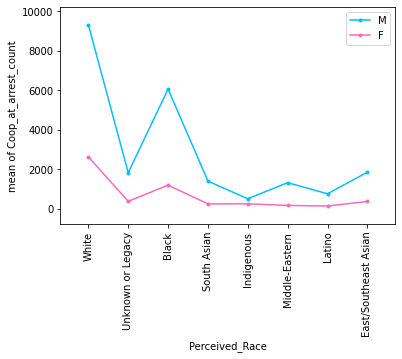

In [ ]:
from statsmodels.graphics.factorplots import interaction_plot
from scipy import stats

interaction_plot(x=grouped_data0['Perceived_Race'], trace=grouped_data0['Sex'], response=grouped_data0['Coop_at_arrest_count'], colors = ["deepskyblue", "hotpink"])

interaction_axes = plt.gca()
interaction_axes.set_xticks(ticks = [0, 1, 2, 3, 4, 5, 6, 7])
interaction_axes.set_xticklabels(race_dict.keys())
plt.xticks(rotation = 90)

plt.legend(labels = sex_dict.keys(), bbox_to_anchor = (1, 1))

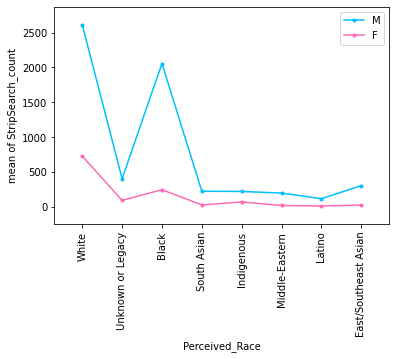

In [ ]:
interaction_plot(x=grouped_data1['Perceived_Race'], trace=grouped_data1['Sex'], response=grouped_data1['StripSearch_count'], colors = ["deepskyblue", "hotpink"])

interaction_axes = plt.gca()
interaction_axes.set_xticks(ticks = [0, 1, 2, 3, 4, 5, 6, 7])
interaction_axes.set_xticklabels(race_dict.keys())
plt.xticks(rotation = 90)

plt.legend(labels = sex_dict.keys(), bbox_to_anchor = (1, 1))

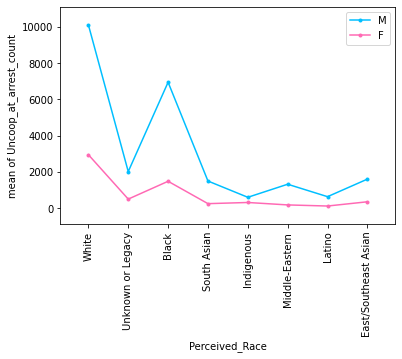

In [ ]:
interaction_plot(x=grouped_data3['Perceived_Race'], trace=grouped_data3['Sex'], response=grouped_data3['Uncoop_at_arrest_count'], colors = ["deepskyblue", "hotpink"])

interaction_axes = plt.gca()
interaction_axes.set_xticks(ticks = [0, 1, 2, 3, 4, 5, 6, 7])
interaction_axes.set_xticklabels(race_dict.keys())
plt.xticks(rotation = 90)

plt.legend(labels = sex_dict.keys(), bbox_to_anchor = (1, 1))

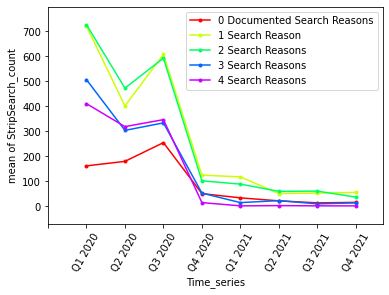

In [ ]:
interaction_plot(x=grouped_data4['Time_series'], trace=grouped_data4['SearchReason'], response=grouped_data4['StripSearch_count'])

interaction_axes = plt.gca()
interaction_axes.set_xticks(ticks = [0, 1, 2, 3, 4, 5, 6, 7, 8])
interaction_axes.set_xticklabels(["", "Q1 2020", "Q2 2020", "Q3 2020", "Q4 2020", "Q1 2021", "Q2 2021", "Q3 2021", "Q4 2021"])
plt.xticks(rotation = 60)

plt.legend(labels = ["0 Documented Search Reasons", "1 Search Reason", "2 Search Reasons", "3 Search Reasons", "4 Search Reasons"])